<h1 style="text-align:center; font-size: 4.5em;">Airplane Crashes Regression Testing</h1>

Data source: https://www.kaggle.com/datasets/thedevastator/airplane-crashes-and-fatalities
 
## Attributes
 
1) index: the index of the row
 
2) Date: the date of the incident
 
3) Time: the time of the incident
 
4) Location: the location of the incident
 
5) Operator: the operator of the aircraft
 
6) Flight #: the flight number of the aircraft
 
7) Route: the route of the aircraft
 
8) Type: the type of aircraft
 
9) Registration: the registration of the aircraft
 
10) cn/In: the construction number/serial number of the aircraft
 
11) Aboard: the number of people on board the aircraft
 
12) Fatalities: the number of fatalities in the incident
 
13) Ground: the number of people on the ground killed in the incident
 
14) Summary: a summary of the incidentData source: https://www.kaggle.com/datasets/thedevastator/airplane-crashes-and-fatalities
 


# Import libraries

In [155]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Optional libraries if you want to remove the Warnings while implementing the models:
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [156]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_data.csv')
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.000000,5.000000,0.000000,First U.S. dirigible Akron exploded just offsh...
1,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.000000,1.000000,0.000000,The first fatal airplane accident in Canada oc...
2,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.000000,14.000000,0.000000,The airship flew into a thunderstorm and encou...
3,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.000000,21.000000,0.000000,Crashed into trees while attempting to land af...
4,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.000000,19.000000,0.000000,"Exploded and burned near Neuwerk Island, when..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,05/03/2009,12:00,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,NaN,Patrol,Mi-35,EV08114,NaN,18.000000,18.000000,0.000000,The helicopter was patrolling along the Venezu...
4737,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.000000,98.000000,2.000000,"While on approach, the military transport cras..."
4738,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.000000,4.000000,NaN,The cargo plane crashed while on approach to I...
4739,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.000000,228.000000,0.000000,The Airbus went missing over the AtlantiOcean ...


## Pre-processing

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4741 non-null   object 
 1   Time          2741 non-null   object 
 2   Location      4724 non-null   object 
 3   Operator      4726 non-null   object 
 4   Flight #      967 non-null    object 
 5   Route         3196 non-null   object 
 6   Type          4717 non-null   object 
 7   Registration  4441 non-null   object 
 8   cn/In         3643 non-null   object 
 9   Aboard        4722 non-null   float64
 10  Fatalities    4730 non-null   float64
 11  Ground        4721 non-null   float64
 12  Summary       4388 non-null   object 
dtypes: float64(3), object(10)
memory usage: 481.6+ KB


In [158]:
df.isnull().sum()


Date               0
Time            2000
Location          17
Operator          15
Flight #        3774
Route           1545
Type              24
Registration     300
cn/In           1098
Aboard            19
Fatalities        11
Ground            20
Summary          353
dtype: int64

- Null values quite prevalant in most columns that requires further pre-processing and cleaning

In [159]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'df'

# Check for rows where Aboard is less than Fatalities
invalid_rows = df[df['Aboard'] < df['Fatalities']]

if len(invalid_rows) == 0:
    print("All rows satisfy the condition: Aboard >= Fatalities")
else:
    print("There are rows where Aboard < Fatalities. You may need to investigate further.")
    print(invalid_rows)


All rows satisfy the condition: Aboard >= Fatalities


In [160]:
df['Operator'].value_counts()

Operator
Aeroflot                           160
Military - U.S. Air Force          160
Air France                          63
Deutsche Lufthansa                  61
Military - U.S. Army Air Forces     42
                                  ... 
Southeast Sky - Air Taxi             1
Pan ArctiOil                         1
Hlavka Aviation - Air Taxi           1
Alaska International Air             1
Strait Air                           1
Name: count, Length: 2289, dtype: int64

In [161]:
# Filter rows where 'Operator' column is null
ground_null_df = df[df['Ground'].isnull()]

display(ground_null_df)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
21,10/20/1919,NaN,English Channel,Aircraft Transport and Travel,NaN,NaN,De Havilland DH-4,G-EAHG,NaN,NaN,NaN,NaN,NaN
202,11/18/1930,c: 2:00,"Techachapi Mountains, California",PacifiAir Transport,NaN,"Burbank, CA - Oakland, CA",Boeing 40,NC5340,NaN,3.000000,3.000000,NaN,Crashed into a mountainside at an altitude of ...
271,11/09/1933,22:35,"Portland, Oregon",United Air Lines,NaN,"Seattle, WA - Dallas, TX",Boeing 247,NC13345,NaN,9.000000,4.000000,NaN,Crashed in a thickly wooded area upon taking o...
273,11/20/1933,NaN,"Near Tsinan, China",China National Aviation Corporation,NaN,Canton - Shanghi,Sinson,NaN,NaN,8.000000,8.000000,NaN,Crashed into the Chingshan mountain range in fog.
292,08/10/1934,NaN,"Ningbo, China",China National Aviation Corporation,NaN,NaN,Sikorsky S-38B,NaN,NaN,NaN,NaN,NaN,NaN
320,08/13/1935,NaN,"Hangow, China",China National Aviation Corporation,NaN,NaN,Sikorsky S-38B,NV40V,NaN,NaN,NaN,NaN,Destoryed in a storm.
373,12/26/1936,NaN,"Nanking, China",China National Aviation Corporation,NaN,NaN,Douglas DC-2,NC14269,NaN,NaN,NaN,NaN,NaN
468,11/20/1939,NaN,"Gosport, England",British Airways,NaN,NaN,Airspeed Oxford,G-AFFM,NaN,2.000000,2.000000,NaN,NaN
477,07/07/1940,NaN,Gulf of Tonkin,Air France,NaN,NaN,Dewoitine D-338,F-AQBA,1,NaN,NaN,NaN,Shot down by a Japanese military fighter.
506,01/24/1942,NaN,"Near Samarinda, Borneo",KNILM,NaN,NaN,Douglas DC-3,PK-AFW,1982,NaN,NaN,NaN,Shot down by Japanese military aircraft.


## Data Cleaning

- Focus on removing irrelavant columns first

In [162]:
# Drop irrelavant columns or those with too many values 

df_copy = df.drop(columns=['Time', 'Flight #'])

df_copy

,Date,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.000000,5.000000,0.000000,First U.S. dirigible Akron exploded just offsh...
1,08/06/1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.000000,1.000000,0.000000,The first fatal airplane accident in Canada oc...
2,09/09/1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.000000,14.000000,0.000000,The airship flew into a thunderstorm and encou...
3,03/05/1915,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),NaN,NaN,41.000000,21.000000,0.000000,Crashed into trees while attempting to land af...
4,09/03/1915,"Off Cuxhaven, Germany",Military - German Navy,NaN,Zeppelin L-10 (airship),NaN,NaN,19.000000,19.000000,0.000000,"Exploded and burned near Neuwerk Island, when..."
...,...,...,...,...,...,...,...,...,...,...,...
4736,05/03/2009,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,Patrol,Mi-35,EV08114,NaN,18.000000,18.000000,0.000000,The helicopter was patrolling along the Venezu...
4737,05/20/2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.000000,98.000000,2.000000,"While on approach, the military transport cras..."
4738,05/26/2009,"Near Isiro, DemocratiRepubliCongo",Service Air,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.000000,4.000000,NaN,The cargo plane crashed while on approach to I...
4739,06/01/2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.000000,228.000000,0.000000,The Airbus went missing over the AtlantiOcean ...


In [163]:
## Remove rows where aboard, ground and fatalities are all null

# Remove rows where 'Aboard', 'Fatalities', and 'Ground' are all null
df_copy = df_copy.dropna(subset=['Aboard', 'Fatalities', 'Ground'], how='all')

# Print the cleaned DataFrame
display(df_copy)

,Date,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.000000,5.000000,0.000000,First U.S. dirigible Akron exploded just offsh...
1,08/06/1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.000000,1.000000,0.000000,The first fatal airplane accident in Canada oc...
2,09/09/1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.000000,14.000000,0.000000,The airship flew into a thunderstorm and encou...
3,03/05/1915,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),NaN,NaN,41.000000,21.000000,0.000000,Crashed into trees while attempting to land af...
4,09/03/1915,"Off Cuxhaven, Germany",Military - German Navy,NaN,Zeppelin L-10 (airship),NaN,NaN,19.000000,19.000000,0.000000,"Exploded and burned near Neuwerk Island, when..."
...,...,...,...,...,...,...,...,...,...,...,...
4736,05/03/2009,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,Patrol,Mi-35,EV08114,NaN,18.000000,18.000000,0.000000,The helicopter was patrolling along the Venezu...
4737,05/20/2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.000000,98.000000,2.000000,"While on approach, the military transport cras..."
4738,05/26/2009,"Near Isiro, DemocratiRepubliCongo",Service Air,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.000000,4.000000,NaN,The cargo plane crashed while on approach to I...
4739,06/01/2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.000000,228.000000,0.000000,The Airbus went missing over the AtlantiOcean ...


In [164]:
df_copy.isnull().sum()

Date               0
Location          16
Operator          15
Route           1535
Type              23
Registration     299
cn/In           1091
Aboard             8
Fatalities         0
Ground             9
Summary          348
dtype: int64

- Drop the null rows on the following columns: ['Aboard', 'Fatalities', 'Location', 'Operator', 'Type', 'Ground']

In [165]:
# Define the columns to consider
columns_to_consider = ['Aboard', 'Fatalities', 'Location', 'Operator', 'Type', 'Ground']

# Remove rows with null values in the specified columns
df_cleaned = df_copy.dropna(subset=columns_to_consider)

# Display the cleaned DataFrame
display(df_cleaned)

df_cleaned.isnull().sum()

,Date,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5.000000,5.000000,0.000000,First U.S. dirigible Akron exploded just offsh...
1,08/06/1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1.000000,1.000000,0.000000,The first fatal airplane accident in Canada oc...
2,09/09/1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20.000000,14.000000,0.000000,The airship flew into a thunderstorm and encou...
3,03/05/1915,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),NaN,NaN,41.000000,21.000000,0.000000,Crashed into trees while attempting to land af...
4,09/03/1915,"Off Cuxhaven, Germany",Military - German Navy,NaN,Zeppelin L-10 (airship),NaN,NaN,19.000000,19.000000,0.000000,"Exploded and burned near Neuwerk Island, when..."
...,...,...,...,...,...,...,...,...,...,...,...
4735,04/29/2009,"Massamba, DemocratiRepubliof Congo",Bako Air,"Bangui, CAR- Brazzaville, Congo - Harare, Zimb...",Boeing B-737-200,TL-ADM,22264/753,7.000000,7.000000,0.000000,Crashed while en route on a ferrying flight. T...
4736,05/03/2009,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,Patrol,Mi-35,EV08114,NaN,18.000000,18.000000,0.000000,The helicopter was patrolling along the Venezu...
4737,05/20/2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.000000,98.000000,2.000000,"While on approach, the military transport cras..."
4739,06/01/2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.000000,228.000000,0.000000,The Airbus went missing over the AtlantiOcean ...


Date               0
Location           0
Operator           0
Route           1495
Type               0
Registration     274
cn/In           1049
Aboard             0
Fatalities         0
Ground             0
Summary          330
dtype: int64

In [166]:
# Define the columns to keep
columns_to_keep = ['Date', 'Location', 'Operator', 'Type', 'Aboard', 'Fatalities', 'Ground']

# Remove rows with null values in the specified columns
df_cleaned = df_cleaned.drop(columns=['Route', 'Registration', 'cn/In', 'Summary'])

# Display the cleaned DataFrame
display(df_cleaned)
df_cleaned.isnull().sum()

,Date,Location,Operator,Type,Aboard,Fatalities,Ground
0,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.000000,5.000000,0.000000
1,08/06/1913,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.000000,1.000000,0.000000
2,09/09/1913,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.000000,14.000000,0.000000
3,03/05/1915,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),41.000000,21.000000,0.000000
4,09/03/1915,"Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),19.000000,19.000000,0.000000
...,...,...,...,...,...,...,...
4735,04/29/2009,"Massamba, DemocratiRepubliof Congo",Bako Air,Boeing B-737-200,7.000000,7.000000,0.000000
4736,05/03/2009,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,Mi-35,18.000000,18.000000,0.000000
4737,05/20/2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.000000,98.000000,2.000000
4739,06/01/2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.000000,228.000000,0.000000


Date          0
Location      0
Operator      0
Type          0
Aboard        0
Fatalities    0
Ground        0
dtype: int64

### Data Encoding

In [167]:
import re

# Define the regex pattern
pattern = r'\b(air(?! (forces))|airlines|air lines|airline|air line|airways)\b'

# Check if 'Operator' column contains the specified terms using the regex pattern
operator_mask = df_cleaned['Operator'].str.contains(pattern, case=False, regex=True)

# Count the number of rows satisfying the condition
operator_count = operator_mask.sum()

# Check the number of rows where the operator name contains 'military' (case-insensitive)
military_count = df_cleaned[df_cleaned['Operator'].str.contains('military', case=False)].shape[0]
operator_mask_private = df_cleaned['Operator'].str.contains('private', case=False)
# Count the number of rows satisfying the condition
operator_count_private = operator_mask_private.sum()

print("Number of rows with 'air', 'airlines', 'air lines', or 'airways' in the Operator name:", operator_count)
print("Number of rows with 'military' in the operator name:", military_count)



Number of rows with 'air', 'airlines', 'air lines', or 'airways' in the Operator name: 2678
Number of rows with 'military' in the operator name: 693


In [168]:
import re

def categorize_operator(operator_name):
    if re.search(r'military', operator_name, re.IGNORECASE):
        return 'military'
    elif re.search(r'\b(air(?! (forces))|airlines|air lines|airline|air line|airways)\b', operator_name, re.IGNORECASE):
        return 'commercial'
    else:
        return 'other'

# Apply the function to create the 'Operator_Category' column
df_cleaned['Operator_Category'] = df_cleaned['Operator'].apply(categorize_operator)

# Display the DataFrame with the new column
display(df_cleaned)

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Operator_Category
0,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.000000,5.000000,0.000000,military
1,08/06/1913,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.000000,1.000000,0.000000,other
2,09/09/1913,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.000000,14.000000,0.000000,military
3,03/05/1915,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),41.000000,21.000000,0.000000,military
4,09/03/1915,"Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),19.000000,19.000000,0.000000,military
...,...,...,...,...,...,...,...,...
4735,04/29/2009,"Massamba, DemocratiRepubliof Congo",Bako Air,Boeing B-737-200,7.000000,7.000000,0.000000,commercial
4736,05/03/2009,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,Mi-35,18.000000,18.000000,0.000000,military
4737,05/20/2009,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.000000,98.000000,2.000000,military
4739,06/01/2009,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.000000,228.000000,0.000000,commercial


- Focus of the dataset is going to be on the operator type, which is why its separated into 'military', 'commercial' and 'others'

In [169]:
# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Extract month and year into separate columns
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Display the DataFrame with separated 'Month' and 'Year' columns
df_cleaned



,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Operator_Category,Month,Year
0,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.000000,5.000000,0.000000,military,7,1912
1,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.000000,1.000000,0.000000,other,8,1913
2,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.000000,14.000000,0.000000,military,9,1913
3,1915-03-05,"Tienen, Belgium",Military - German Navy,Zeppelin L-8 (airship),41.000000,21.000000,0.000000,military,3,1915
4,1915-09-03,"Off Cuxhaven, Germany",Military - German Navy,Zeppelin L-10 (airship),19.000000,19.000000,0.000000,military,9,1915
...,...,...,...,...,...,...,...,...,...,...
4735,2009-04-29,"Massamba, DemocratiRepubliof Congo",Bako Air,Boeing B-737-200,7.000000,7.000000,0.000000,commercial,4,2009
4736,2009-05-03,"Near El Alto de Rubio, Venezuela",Military - Venezuelan Army,Mi-35,18.000000,18.000000,0.000000,military,5,2009
4737,2009-05-20,"Near Madiun, Indonesia",Military - Indonesian Air Force,Lockheed C-130 Hercules,112.000000,98.000000,2.000000,military,5,2009
4739,2009-06-01,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,Airbus A330-203,228.000000,228.000000,0.000000,commercial,6,2009


#### Normalising the data

In [170]:
import pandas as pd

# Convert categorical columns to dummy variables
dummy_columns = ['Operator_Category']
df_encoded = pd.get_dummies(df_cleaned, columns=dummy_columns, drop_first=False, dtype='int')

columns_to_drop = ['Date', 'Location', 'Operator', 'Type']
df_encoded.drop(columns=columns_to_drop, inplace=True)

display(df_encoded)




,Aboard,Fatalities,Ground,Month,Year,Operator_Category_commercial,Operator_Category_military,Operator_Category_other
0,5.000000,5.000000,0.000000,7,1912,0,1,0
1,1.000000,1.000000,0.000000,8,1913,0,0,1
2,20.000000,14.000000,0.000000,9,1913,0,1,0
3,41.000000,21.000000,0.000000,3,1915,0,1,0
4,19.000000,19.000000,0.000000,9,1915,0,1,0
...,...,...,...,...,...,...,...,...
4735,7.000000,7.000000,0.000000,4,2009,1,0,0
4736,18.000000,18.000000,0.000000,5,2009,0,1,0
4737,112.000000,98.000000,2.000000,5,2009,0,1,0
4739,228.000000,228.000000,0.000000,6,2009,1,0,0


- Encode the categorical variables for regression modelling

# EDA

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned.describe()

,Date,Aboard,Fatalities,Ground,Month,Year
count,4665,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000
mean,1972-04-23 11:12:18.520900272,27.915756,20.132690,1.771275,6.626581,1971.802144
min,1912-07-12 00:00:00,0.000000,0.000000,0.000000,1.000000,1912.000000
25%,1955-03-06 00:00:00,5.000000,3.000000,0.000000,3.000000,1955.000000
50%,1973-09-20 00:00:00,13.000000,9.000000,0.000000,7.000000,1973.000000
75%,1990-11-19 00:00:00,30.000000,23.000000,0.000000,10.000000,1990.000000
max,2009-06-07 00:00:00,644.000000,583.000000,2750.000000,12.000000,2009.000000
std,NaN,43.817648,33.307783,57.242684,3.552459,22.208896


In [172]:
# Select only numeric columns for description
numeric_columns = df_cleaned.select_dtypes(include=np.number)

# Display description of numeric columns
numeric_columns.describe()


,Aboard,Fatalities,Ground,Month,Year
count,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000
mean,27.915756,20.132690,1.771275,6.626581,1971.802144
std,43.817648,33.307783,57.242684,3.552459,22.208896
min,0.000000,0.000000,0.000000,1.000000,1912.000000
25%,5.000000,3.000000,0.000000,3.000000,1955.000000
50%,13.000000,9.000000,0.000000,7.000000,1973.000000
75%,30.000000,23.000000,0.000000,10.000000,1990.000000
max,644.000000,583.000000,2750.000000,12.000000,2009.000000


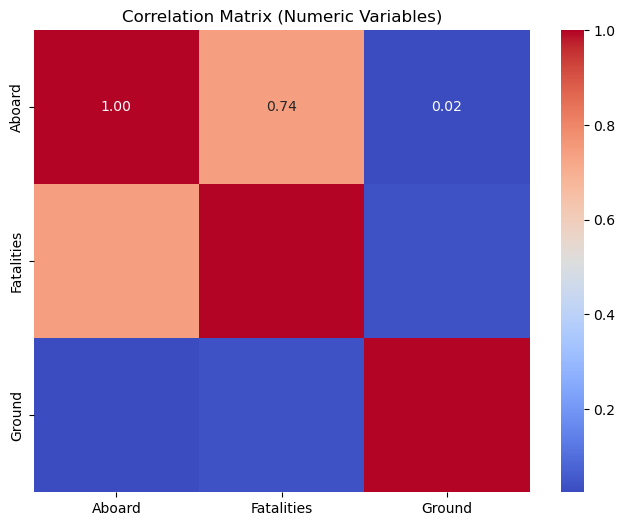

In [173]:
# Select only numeric columns
numeric_cols = ['Aboard', 'Fatalities', 'Ground']

# Compute the correlation matrix for numeric columns
numeric_corr = df_cleaned[numeric_cols].corr()

# Visualize the correlation matrix for numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Numeric Variables)')
plt.show()


- Strong correlation between 'aboard' and 'fatalities'

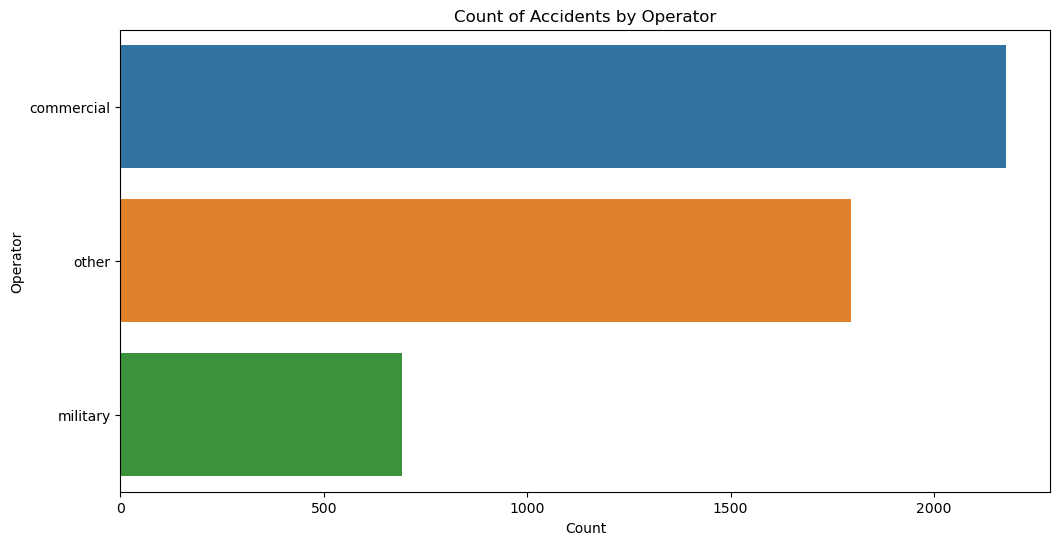

In [174]:
# Visualize the count of accidents by operator
plt.figure(figsize=(12, 6))
sns.countplot(y='Operator_Category', data=df_cleaned, order=df_cleaned['Operator_Category'].value_counts().index[:10])
plt.title('Count of Accidents by Operator')
plt.xlabel('Count')
plt.ylabel('Operator')
plt.show()

- 'Commericial' planes have historically had a lot of accidents

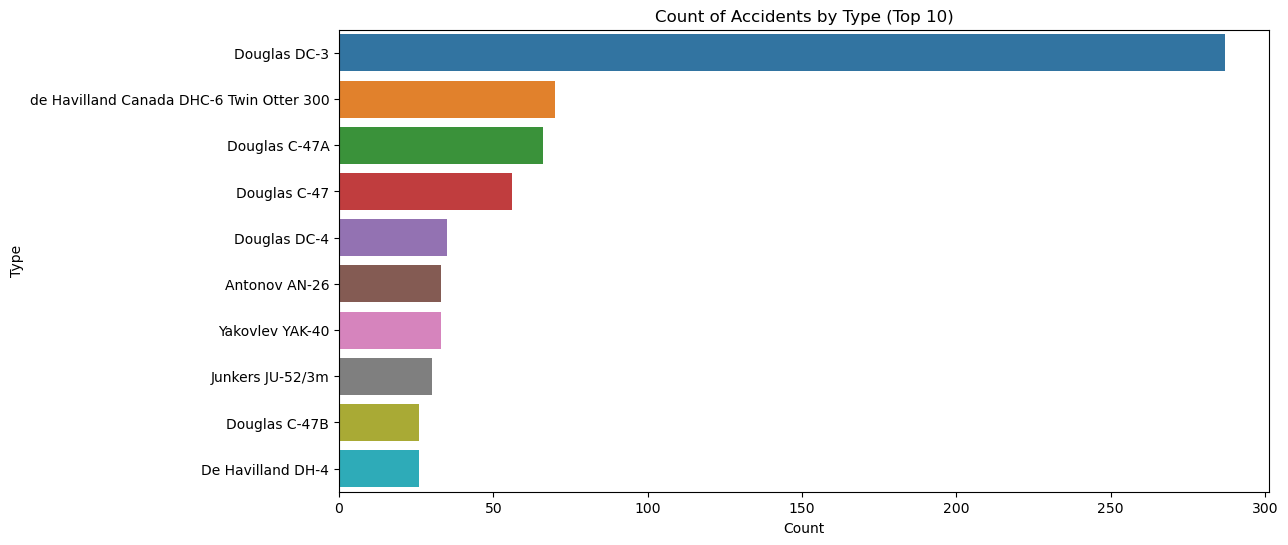

In [175]:
# Visualize the count of accidents by Type
plt.figure(figsize=(12, 6))
sns.countplot(y='Type', data=df_cleaned, order=df_cleaned['Type'].value_counts().index[:10])
plt.title('Count of Accidents by Type (Top 10)')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()


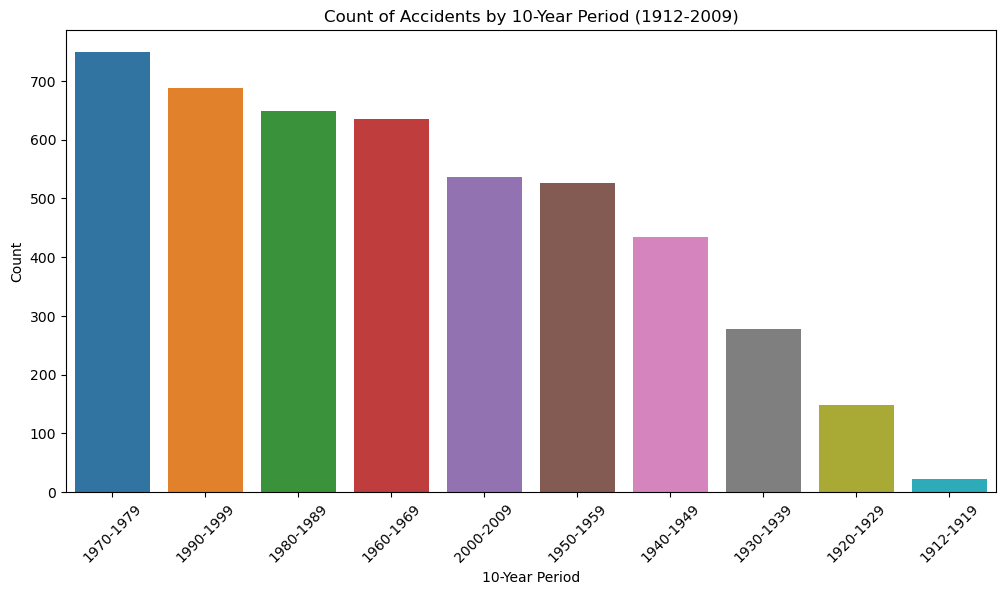

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the start and end years for each 10-year period within the range 1912-2009
periods = [(1912, 1919), (1920, 1929), (1930, 1939), (1940, 1949), (1950, 1959),
           (1960, 1969), (1970, 1979), (1980, 1989), (1990, 1999), (2000, 2009)]

# Create a function to assign the 10-year period for each year
def get_period(year):
    for start, end in periods:
        if start <= year <= end:
            return f'{start}-{end}'

# Apply the function to create a new column indicating the 10-year period for each accident
df_cleaned['10-Year Period'] = df_cleaned['Year'].apply(get_period)

# Visualize the count of accidents by 10-year periods
plt.figure(figsize=(12, 6))
sns.countplot(x='10-Year Period', data=df_cleaned, order=df_cleaned['10-Year Period'].value_counts().index)
plt.title('Count of Accidents by 10-Year Period (1912-2009)')
plt.xlabel('10-Year Period')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- 1970's was the worst era for airplane crashes

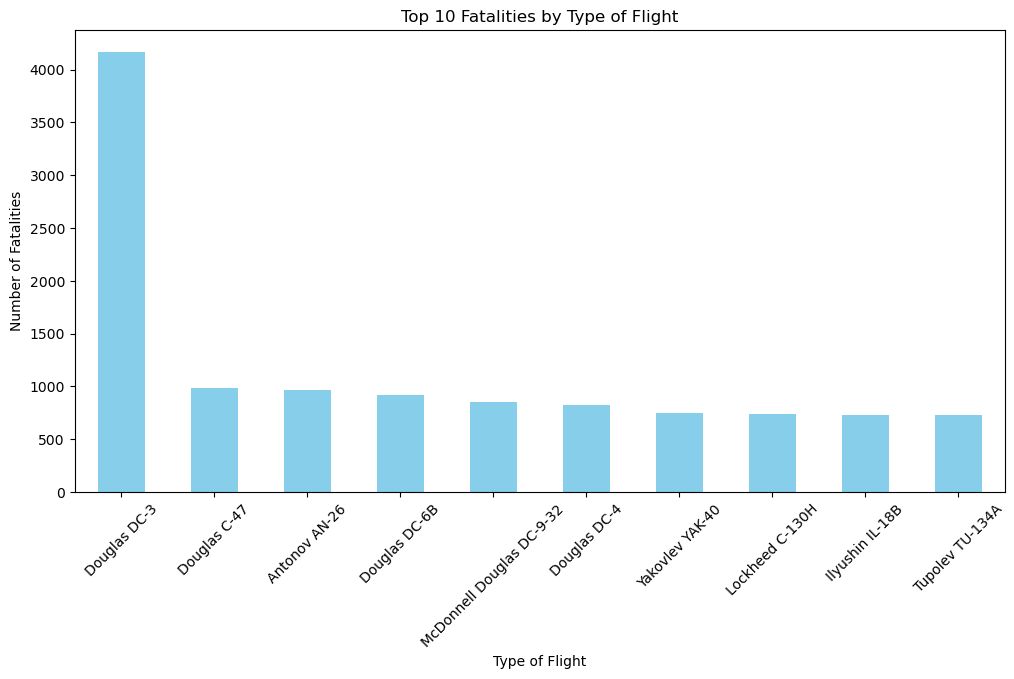

In [177]:
# Count of fatatalities by type: 
import matplotlib.pyplot as plt
# Group the data by 'Type' and sum the 'Fatalities' column
fatalities_by_type = df_cleaned.groupby('Type')['Fatalities'].sum().sort_values(ascending=False)

# Take the top 10
top_10_fatalities = fatalities_by_type.head(10)

# Plot the data
plt.figure(figsize=(12, 6))
top_10_fatalities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Fatalities by Type of Flight')
plt.xlabel('Type of Flight')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.show()


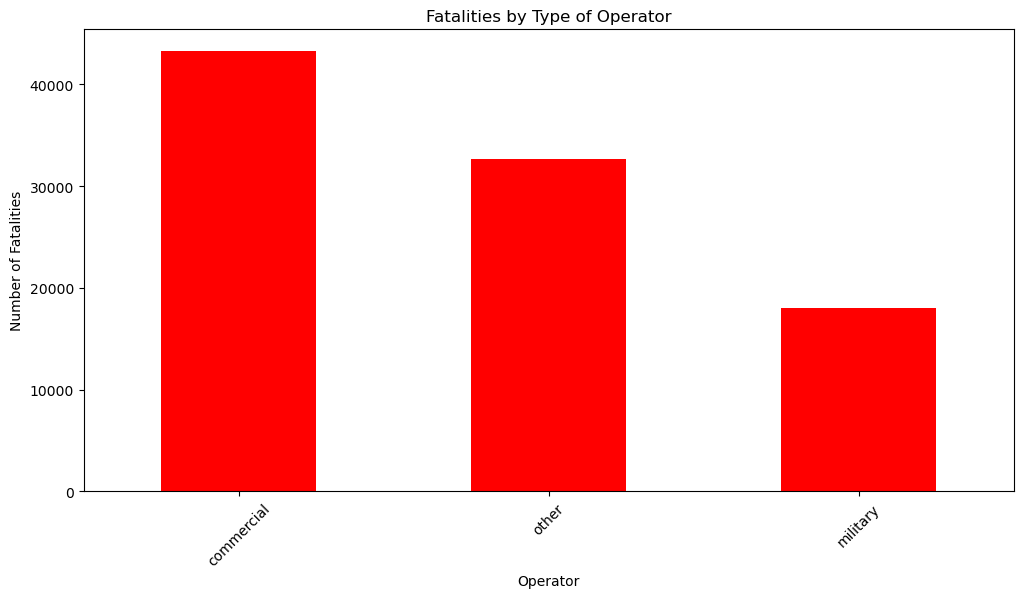

In [178]:
# Fatalities by operator: 
import matplotlib.pyplot as plt
# Group the data by 'Type' and sum the 'Fatalities' column
fatalities_by_type = df_cleaned.groupby('Operator_Category')['Fatalities'].sum().sort_values(ascending=False)

# Take the top 10
top_10_fatalities = fatalities_by_type

# Plot the data
plt.figure(figsize=(12, 6))
top_10_fatalities.plot(kind='bar', color='red')
plt.title('Fatalities by Type of Operator')
plt.xlabel('Operator')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45)
plt.show()

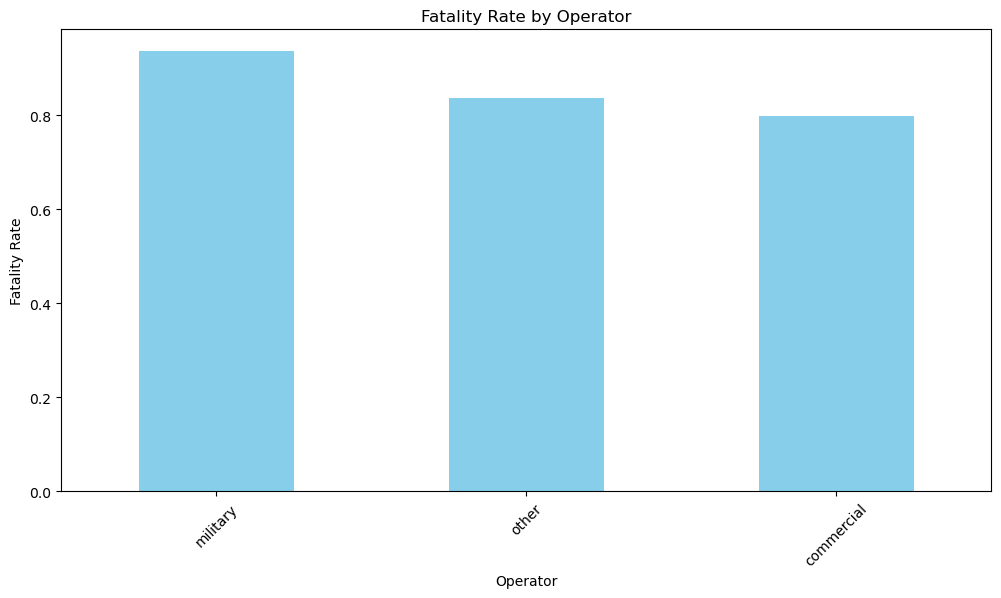

In [179]:
# Calculate fatality rate
df_cleaned['Fatality_Rate'] = df_cleaned['Fatalities'] / df_cleaned['Aboard']

# Group the data by 'Operator_Category' and calculate the mean fatality rate
fatality_rate_by_operator = df_cleaned.groupby('Operator_Category')['Fatality_Rate'].mean().sort_values(ascending=False)

# Plot the fatality rate by operator
plt.figure(figsize=(12, 6))
fatality_rate_by_operator.plot(kind='bar', color='skyblue')
plt.title('Fatality Rate by Operator')
plt.xlabel('Operator')
plt.ylabel('Fatality Rate')
plt.xticks(rotation=45)
plt.show()


- When accounting for 'fatality rate', military far outperforms the other variables

In [180]:
df_encoded

,Aboard,Fatalities,Ground,Month,Year,Operator_Category_commercial,Operator_Category_military,Operator_Category_other
0,5.000000,5.000000,0.000000,7,1912,0,1,0
1,1.000000,1.000000,0.000000,8,1913,0,0,1
2,20.000000,14.000000,0.000000,9,1913,0,1,0
3,41.000000,21.000000,0.000000,3,1915,0,1,0
4,19.000000,19.000000,0.000000,9,1915,0,1,0
...,...,...,...,...,...,...,...,...
4735,7.000000,7.000000,0.000000,4,2009,1,0,0
4736,18.000000,18.000000,0.000000,5,2009,0,1,0
4737,112.000000,98.000000,2.000000,5,2009,0,1,0
4739,228.000000,228.000000,0.000000,6,2009,1,0,0


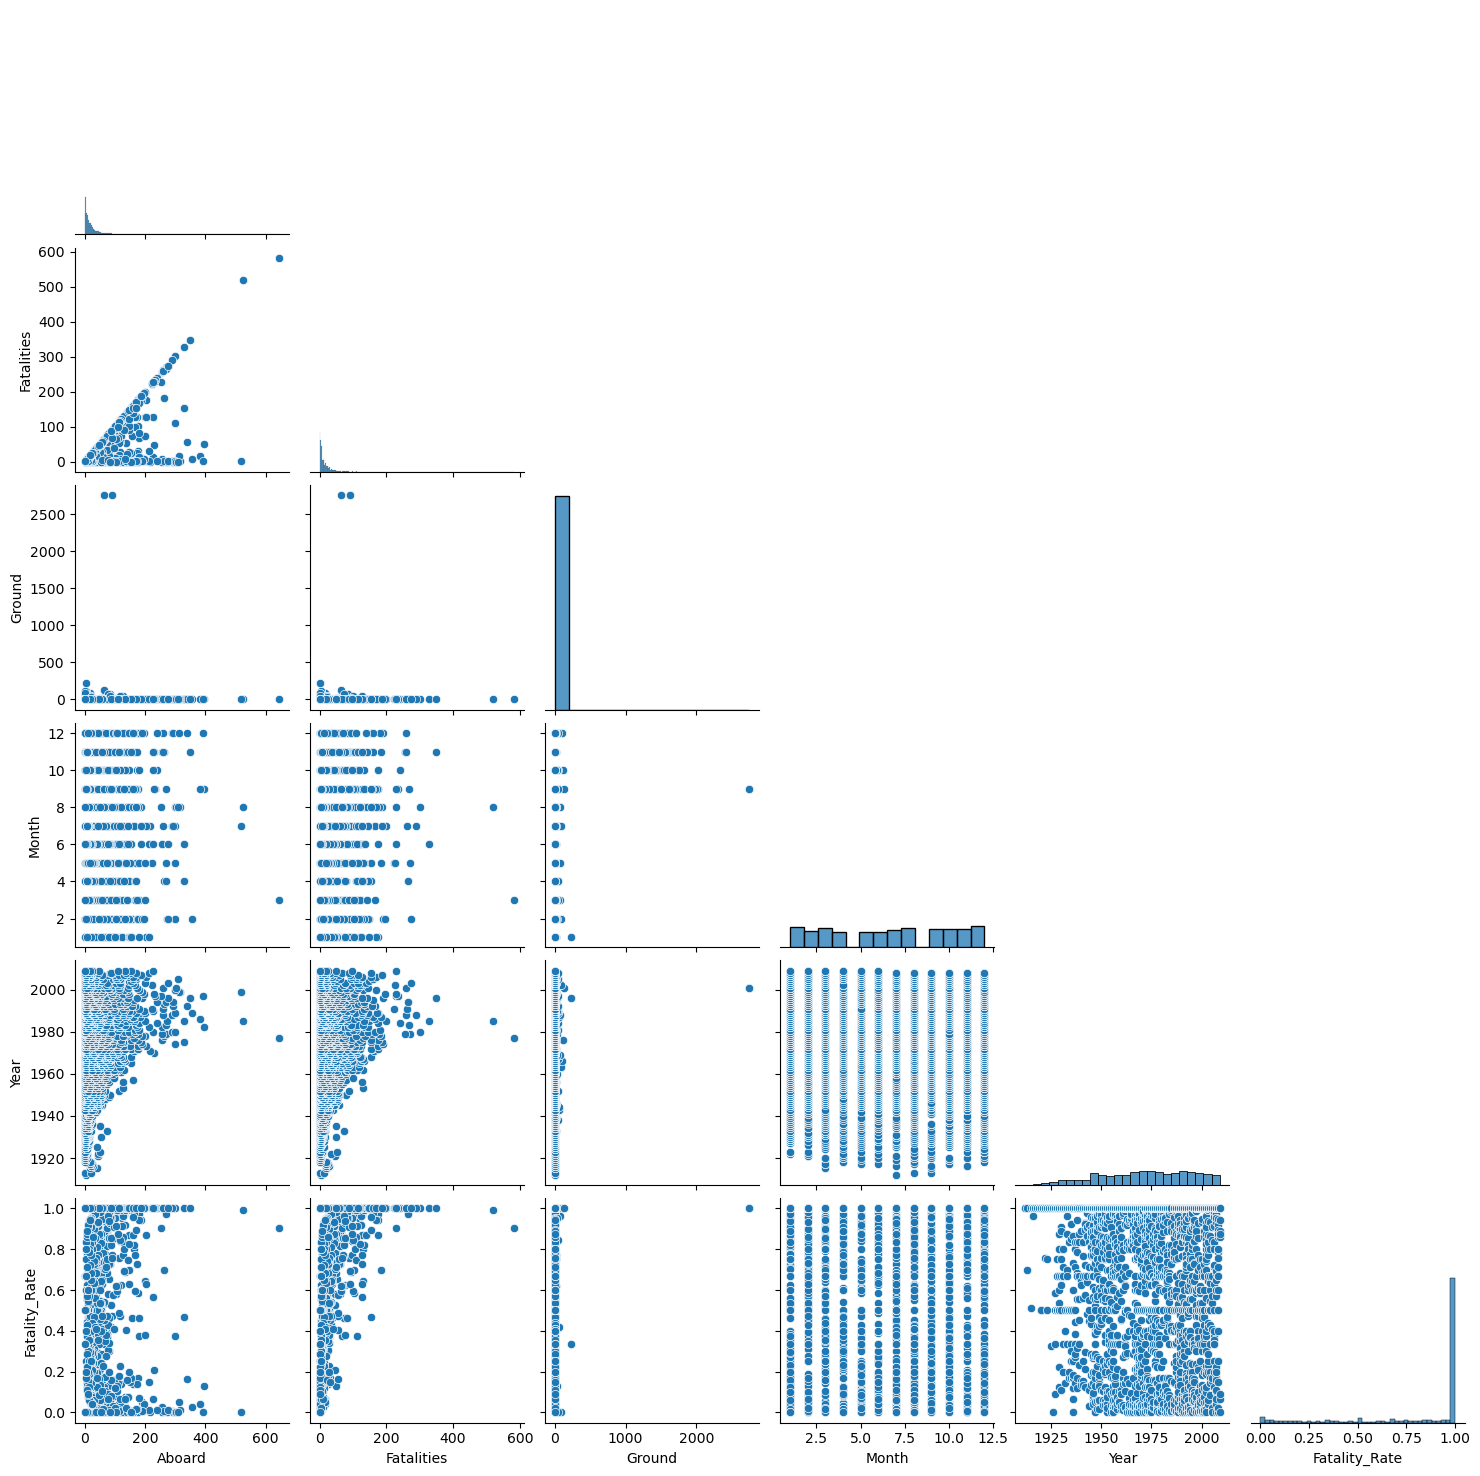

In [181]:
# Create a pairplot for df and note possible relationships
sns.pairplot(df_cleaned, corner=True)

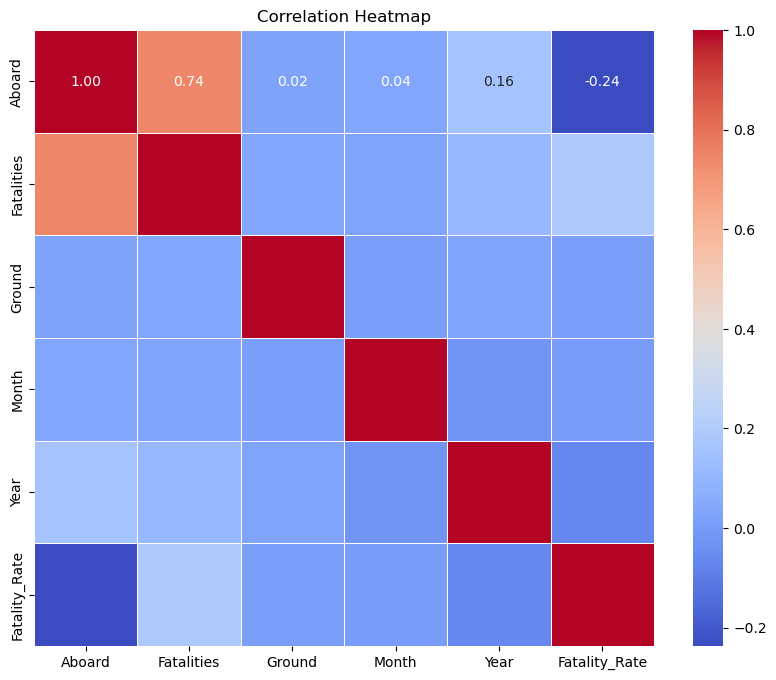

In [182]:
# Create a correlation heatmap for df. 
# Look for any spaces in which Independent variables could be highly related to each other.
import pandas as pd
import seaborn as sns

# Assuming 'dataset' is your DataFrame containing both numeric and non-numeric columns
# Drop non-numeric columns
numeric_dataset = df_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Regression modelling

### Multiple Linear Regression

- This model provides a clear interpretation of the relationship between the independent variables and the target variable.

In [183]:
# Make a new Linear Regression Object 
# Prepare the data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [184]:
df_encoded.head()

,Aboard,Fatalities,Ground,Month,Year,Operator_Category_commercial,Operator_Category_military,Operator_Category_other
0,5.000000,5.000000,0.000000,7,1912,0,1,0
1,1.000000,1.000000,0.000000,8,1913,0,0,1
2,20.000000,14.000000,0.000000,9,1913,0,1,0
3,41.000000,21.000000,0.000000,3,1915,0,1,0
4,19.000000,19.000000,0.000000,9,1915,0,1,0


In [185]:
# Split your information up into a training sample and a testing sample
X = df_encoded[['Aboard', 'Ground', 'Month', 'Year', 'Operator_Category_commercial', 'Operator_Category_military', 'Operator_Category_other']]
y = df_encoded['Fatalities']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[0:5], y_train[0:5]


(        Aboard   Ground  Month  Year  Operator_Category_commercial  \
 2569 40.000000 0.000000      1  1976                             0   
 351  15.000000 0.000000      6  1936                             0   
 1165 15.000000 0.000000      1  1954                             0   
 797  18.000000 0.000000     10  1947                             1   
 766  27.000000 0.000000      4  1947                             0   
 
       Operator_Category_military  Operator_Category_other  
 2569                           0                        1  
 351                            0                        1  
 1165                           0                        1  
 797                            0                        0  
 766                            0                        1  ,
 2569   40.000000
 351     1.000000
 1165   15.000000
 797    18.000000
 766    27.000000
 Name: Fatalities, dtype: float64)

In [186]:
lr.fit(X_train, y_train)

LinearRegression()

In [187]:
pred = lr.predict(X_test)

for val in zip(pred, y_test):
    print(val, val[1]- val[0]) ## real - predicted

(4.066278405883658, 4.0) -0.06627840588365785
(155.01547963893748, 183.0) 27.984520361062522
(18.40938314524003, 25.0) 6.590616854759968
(5.764772030194479, 1.0) -4.764772030194479
(3.7319240787741492, 2.0) -1.7319240787741492
(44.270559144760334, 68.0) 23.729440855239666
(42.61057760365908, 2.0) -40.61057760365908
(4.584472943641288, 4.0) -0.5844729436412877
(18.20054898195425, 14.0) -4.200548981954249
(24.637542251544524, 26.0) 1.3624577484554763
(13.567212861431116, 7.0) -6.567212861431116
(18.578633480595187, 16.0) -2.5786334805951867
(74.12431087929545, 123.0) 48.87568912070455
(3.495245062128909, 3.0) -0.49524506212890884
(21.88180151183045, 33.0) 11.11819848816955
(21.819628489907196, 23.0) 1.1803715100928045
(4.149503065799642, 4.0) -0.14950306579964234
(13.703320997117245, 15.0) 1.2966790028827546
(22.649229829948933, 13.0) -9.649229829948933
(27.491195199418215, 22.0) -5.491195199418215
(108.64089997199153, 68.0) -40.64089997199153
(10.12433193334109, 13.0) 2.8756680666589105

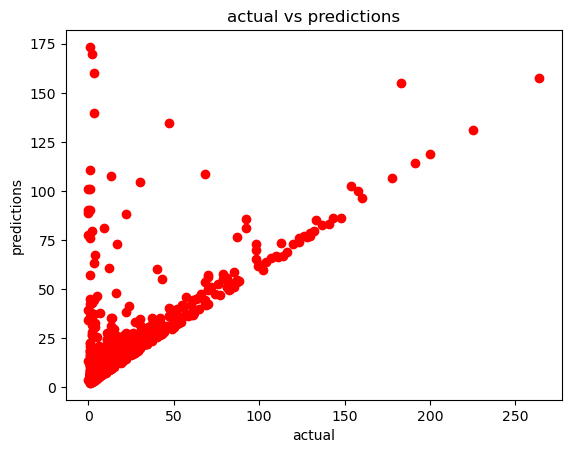

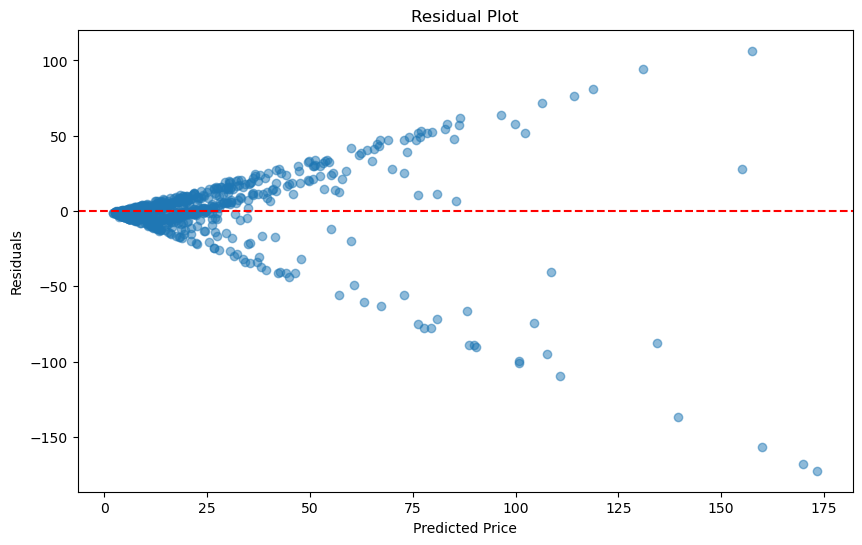

In [188]:
# Create a scatterplot of predictions vs y_test.
# What shape would the scatter plot make if the model was perfect?
plt.scatter(y_test, pred, color = 'red')
plt.title(label = 'actual vs predictions')
plt.xlabel(xlabel='actual')
plt.ylabel(ylabel='predictions')

# Residual plot
residuals = y_test - pred
plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [189]:
# Validate your model using Statistics and Visualizations
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(y_test, pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)


Mean Squared Error (MSE): 439.829585056181
Root Mean Squared Error (RMSE): 20.97211446316706
R-squared (R2): 0.5167329216914642


In [190]:
print('Intercept:',lr.intercept_)


Intercept: 50.055541308840795


In [191]:
df_encoded.drop(columns=['Fatalities']).columns.tolist()

indep_features = df_encoded.drop(columns=['Fatalities']).columns.tolist()
indep_features

['Aboard',
 'Ground',
 'Month',
 'Year',
 'Operator_Category_commercial',
 'Operator_Category_military',
 'Operator_Category_other']

In [192]:
for coef in zip(indep_features,lr.coef_):
    print(coef)

('Aboard', 0.5750799169583458)
('Ground', 0.00951946106368533)
('Month', 0.06033150845062876)
('Year', -0.022893151465350002)
('Operator_Category_commercial', -2.9589919830265976)
('Operator_Category_military', 4.050984890511165)
('Operator_Category_other', -1.0919929074845436)


Formula for fatality prediction: 

Fatalities = 50 + 0.58 * Aboard + 0.01 * Ground + 0.06 * Month - 0.02 Year -2.96 * 'Operator_Category_commercial + 4.05 * Operator_Category_military -1.09 * Operator_Category_other

## Polynomial regression

- This model can capture nonlinear relationships between predictors and the target variable. If there are interactions or nonlinear effects in the data, polynomial regression may be able to capture them more effectively.

In [193]:
# Split your information up into a training sample and a testing sample
X = df_encoded[['Aboard', 'Ground', 'Month', 'Year', 'Operator_Category_commercial', 'Operator_Category_military', 'Operator_Category_other']]
y = df_encoded['Fatalities']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[0:5], y_train[0:5]


(        Aboard   Ground  Month  Year  Operator_Category_commercial  \
 2569 40.000000 0.000000      1  1976                             0   
 351  15.000000 0.000000      6  1936                             0   
 1165 15.000000 0.000000      1  1954                             0   
 797  18.000000 0.000000     10  1947                             1   
 766  27.000000 0.000000      4  1947                             0   
 
       Operator_Category_military  Operator_Category_other  
 2569                           0                        1  
 351                            0                        1  
 1165                           0                        1  
 797                            0                        0  
 766                            0                        1  ,
 2569   40.000000
 351     1.000000
 1165   15.000000
 797    18.000000
 766    27.000000
 Name: Fatalities, dtype: float64)

In [194]:
##Defining the Polynomial model:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)
print(X[0:5])
X_poly[0:5]

     Aboard   Ground  Month  Year  Operator_Category_commercial  \
0  5.000000 0.000000      7  1912                             0   
1  1.000000 0.000000      8  1913                             0   
2 20.000000 0.000000      9  1913                             0   
3 41.000000 0.000000      3  1915                             0   
4 19.000000 0.000000      9  1915                             0   

   Operator_Category_military  Operator_Category_other  
0                           1                        0  
1                           0                        1  
2                           1                        0  
3                           1                        0  
4                           1                        0  


array([[1.000000e+00, 5.000000e+00, 0.000000e+00, 7.000000e+00,
        1.912000e+03, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        2.500000e+01, 0.000000e+00, 3.500000e+01, 9.560000e+03,
        0.000000e+00, 5.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 4.900000e+01, 1.338400e+04, 0.000000e+00,
        7.000000e+00, 0.000000e+00, 3.655744e+06, 0.000000e+00,
        1.912000e+03, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 0.000000e+00, 8.000000e+00,
        1.913000e+03, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 8.000000e+00, 1.913000e+03,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 6.400000e+01, 1.530400e+04, 0.000000e+00,
        0.000000e+00, 8.000000e+00, 3.6

In [195]:
##Using a different Library to evaluate the best value for degrees:#
##https://www.statsmodels.org/stable/regression.html
import statsmodels.api as sm
regressor_2 = sm.OLS(y, X_poly).fit()
y_pred_poly = regressor_2.predict(X_poly)
y[0:5] , y_pred_poly[0:5]

(0    5.000000
 1    1.000000
 2   14.000000
 3   21.000000
 4   19.000000
 Name: Fatalities, dtype: float64,
 array([ 0.15333629, -0.0551317 , 17.37288258, 42.24450399, 16.26989855]))

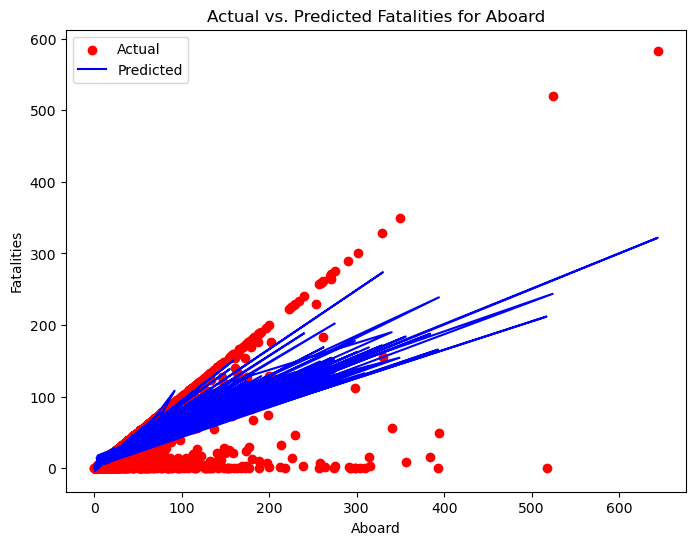

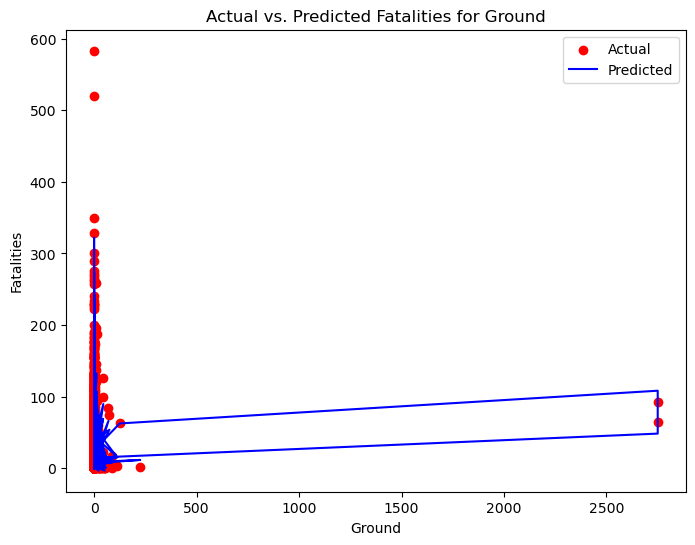

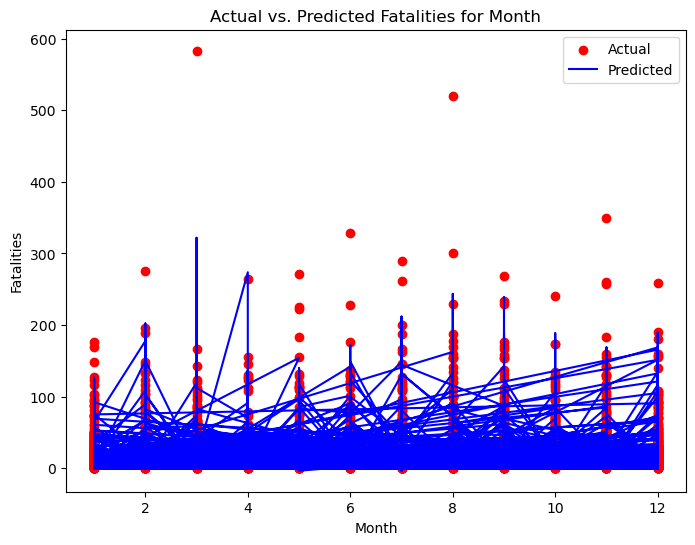

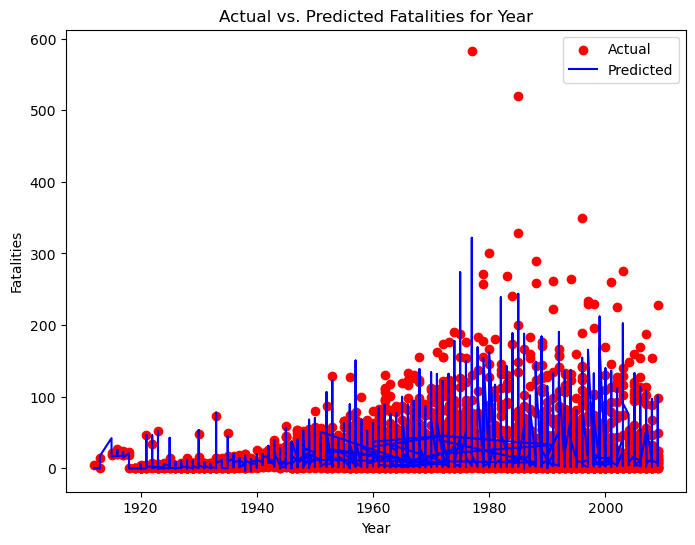

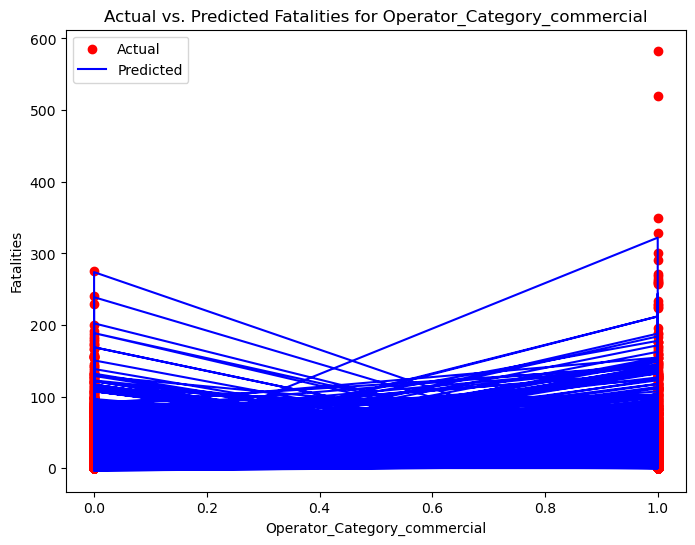

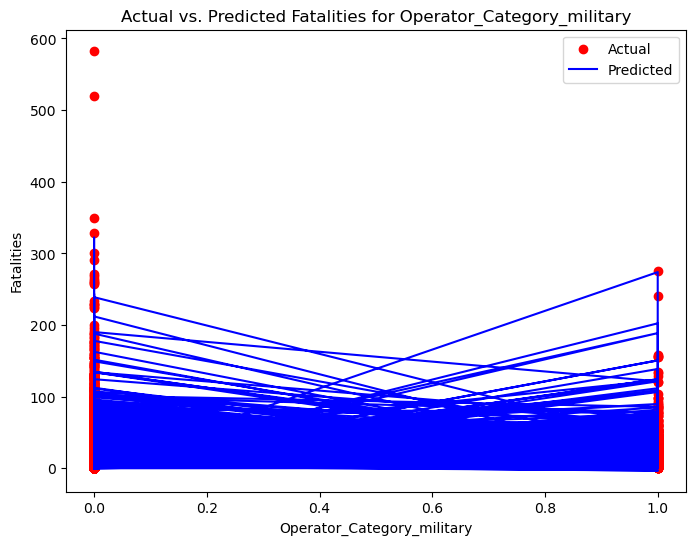

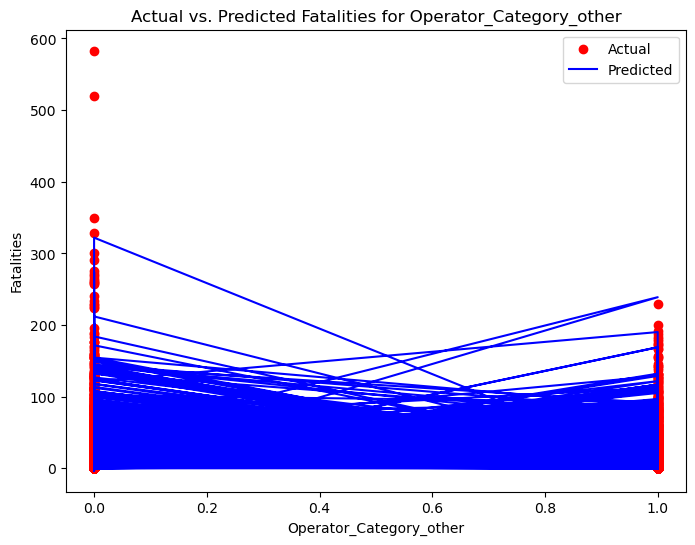

In [196]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted values for each feature
for i in range(1, min(X_poly.shape[1], 8)):  # Adjusted range to plot only 7 graphs
    try:
        plt.figure(figsize=(8, 6))
        plt.scatter(X_poly[:, i], y, color='red', label='Actual')  # Plot actual data points
        plt.plot(X_poly[:, i], y_pred_poly, color='blue', label='Predicted')  # Plot predicted values
        plt.title(f'Actual vs. Predicted Fatalities for {X.columns[i-1]}')
        plt.xlabel(X.columns[i-1])
        plt.ylabel('Fatalities')
        plt.legend()
        plt.show()
    except IndexError:
        pass



In [197]:
# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred_poly)
rmse = np.sqrt(mse)
r_squared = r2_score(y, y_pred_poly)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  460.6087092758289
RMSE:  21.46179650625336
R2:  0.5847269050632045


In [198]:
# Display summary statistics
display(regressor_2.summary().tables[0])


Dep. Variable:,Fatalities,R-squared:,0.585
Model:,OLS,Adj. R-squared:,0.583
Method:,Least Squares,F-statistic:,272.2
Date:,"Wed, 10 Apr 2024",Prob (F-statistic):,0.00
Time:,22:14:02,Log-Likelihood:,-20924.
No. Observations:,4665,AIC:,4.190e+04
Df Residuals:,4640,BIC:,4.206e+04
Df Model:,24,,
Covariance Type:,nonrobust,,


In [199]:
regressor_2.bic, regressor_2.rsquared


(42058.233191318555, 0.5847269050632045)

In [200]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Define the range of degrees
degrees = range(8)  # From 0 to 8 (inclusive)

# Initialize lists to store BIC and R-squared values
bic_values = []
rsquared_values = []

# Iterate over each degree
for degree in degrees:
    # Generate polynomial features using sklearn
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_poly_sklearn = poly_features.fit_transform(X)

    # Manually add intercept term to the polynomial features
    X_poly_statsmodels = sm.add_constant(X_poly_sklearn)

    # Fit the OLS model
    regressor = sm.OLS(y, X_poly_statsmodels)
    regressor_2 = regressor.fit()

    # Append BIC and R-squared values to the lists
    bic_values.append(regressor_2.bic)
    rsquared_values.append(regressor_2.rsquared)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Degree': degrees,
    'BIC': bic_values,
    'R-squared': rsquared_values
})
# Set the display format for floats
pd.options.display.float_format = '{:.6f}'.format

# Display the DataFrame
display(results_df) 


,Degree,BIC,R-squared
0,0,45955.175195,0.000000
1,1,42175.829990,0.560015
2,2,42058.233191,0.584727
3,3,41650.552018,0.644138
4,4,41216.041435,0.699532
5,5,41042.810008,0.724300
6,6,40544.502843,0.753127
7,7,40229.977710,0.767546


- Increasing the number of degrees makes the R-squared value better, that could suggest better modelling 
- However this could result in overfitting

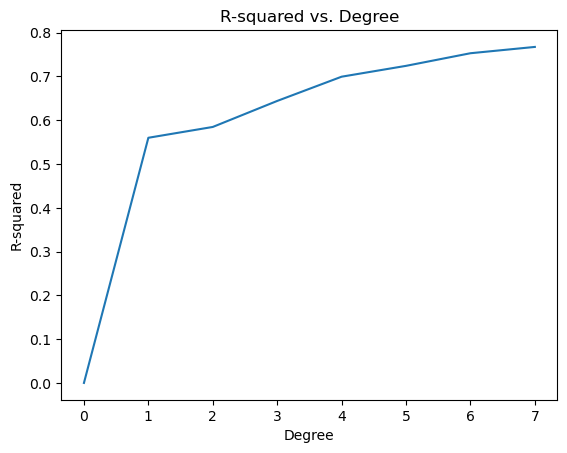

In [201]:
plt.plot('Degree', 'R-squared', data=results_df)
plt.xlabel('Degree')
plt.ylabel('R-squared')
plt.title('R-squared vs. Degree')
plt.show()

- Increasing the number of degrees provides a better result as far as model performance is concerned
- Could result in overfitting

### Ridge Regression

-  Ridge regression can offer a good compromise between model complexity and performance. It helps mitigate multicollinearity and overfitting while still providing reasonable predictive accuracy.

In [202]:
from sklearn.linear_model import Ridge

##Standardising:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# creating ridge object
ridge = Ridge()
# fitting ridge object to training data
ridge.fit(X_train, y_train)


Ridge()

In [203]:
##Capturing the predictions:
y_pred_ridge = ridge.predict(X_test)
y_test[0:5], y_pred_ridge[0:5]

(3372     4.000000
 2761   183.000000
 3491    25.000000
 24       1.000000
 1228     2.000000
 Name: Fatalities, dtype: float64,
 array([  4.06801924, 155.01600536,  18.41001876,   5.76579195,
          3.7337392 ]))

In [204]:
##Evaluating the model:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred_ridge)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  439.83478711152236
RMSE:  20.972238485949045
R2:  0.5167272058820429


In [205]:
# ##Analytsing the coeficients:
# for index, coef in enumerate(ridge.coef_):
#     print(X.columns[index], coef)


In [206]:
ridge.alpha

1.0

- Try different value of alpha

In [207]:
##Changing the ALPHA value:
# creating ridge object
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [208]:
##Capturing the predictions:
y_pred_ridge = ridge.predict(X_test)
y_test[0:5], y_pred_ridge[0:5]

(3372     4.000000
 2761   183.000000
 3491    25.000000
 24       1.000000
 1228     2.000000
 Name: Fatalities, dtype: float64,
 array([  4.22336733, 155.05485834,  18.46035927,   5.84969199,
          3.8955434 ]))

In [209]:
##Evaluating the model:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred_ridge)
print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r_squared)

MSE:  440.36811337473733
RMSE:  20.984949687210054
R2:  0.5161412084099171


- No major changes and model performs similarly to MLR and polynomial despite increasing the alpha value

# Evaluation model

In [210]:
import pandas as pd

# Create a dictionary with the regression results
results = {
    'Model': ['Multiple Linear Regression', 'Polynomial Regression', 'Ridge Regression'],
    'Mean Squared Error (MSE)': [439.829585056181, 460.6087092758289, 440.36811337473733],
    'Root Mean Squared Error (RMSE)': [20.97211446316706, 21.46179650625336, 20.984949687210054],
    'R-squared (R2)': [0.5167329216914642, 0.5847269050632045, 0.5161412084099171]
}

# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)


,Model,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),R-squared (R2)
0,Multiple Linear Regression,439.829585,20.972114,0.516733
1,Polynomial Regression,460.608709,21.461797,0.584727
2,Ridge Regression,440.368113,20.984950,0.516141


- Best model has R-squared close to 1 and a low MSE and RMSE value

- Given that the best model here tends to be the 'Polynomial model' due to a higher R-squared value despite its higher MSE and marignally higher RMSE
- However this would be ideal to see if the data has non-linear effect with each variable 
- Multiple linear regression would best see which independent variables affects theh target variable, in our case 'Fatalities'. 
- Further model tuning could make 'Polynomial model' more feasible

# Unseen data

In [211]:
unseen_df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_unseen.csv')
unseen_df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Ground,Summary
0,10/24/2004,16:30,"Martinsville, Virginia",Private - Hendrick Motorsports Inc.,NaN,"Concord, NC - Martinsville, VA",Beech 200 Super King Air,N501RH,BB-805,10.000000,0.000000,The plane struck a steep incline in the Bull M...
1,08/09/1954,00:08,"Terceira Island, Azores, Portugal",AVIANCA,NaN,"Lajes, Azores - Bermuda",Lockheed 749A-79 Constellation,HK-163,2664,30.000000,0.000000,Crashed into mountains after poor weather dive...
2,12/02/1977,NaN,"Near Al Bayda, Lebanon",Balkan Bulgarian Airlines,NaN,Jeddah - Benghazi,Tupolev TU-154B,LZ-BTN,054,165.000000,0.000000,After not being able to land at the scheduled ...
3,11/02/1988,NaN,"Near Rzeszow, Poland",LOT Polish Airlines,703,Warszawa - Rzeszow,Antonov AN-24B,SP-LTD,67302209,29.000000,0.000000,The plane attempted to make an emergency landi...
4,08/15/1957,NaN,"Copenhagen, Denmark",Aeroflot,NaN,Riga - Copenhagen,Ilyushin IL-14P,CCCP-L1874,146000607,23.000000,0.000000,Crashed into the harbor after hitting the chim...
...,...,...,...,...,...,...,...,...,...,...,...,...
522,04/15/1950,NaN,"Santa Ana, Colombia",Lineas Aéreas Nacionales,NaN,NaN,Douglas C-47 (DC-3),HK-309,NaN,25.000000,0.000000,NaN
523,01/10/1938,15:07,"Bozeman, Montana",Northwest Orient Airlines,2,Seattle - Billings - Chicago,Lockheed 14H Super Electra,NC-17388,1407,10.000000,0.000000,The aircraft crashed 12 miles northeast of Boz...
524,12/14/1977,14:15,"Davenport, Indiana",Straley Flying Service - Air Taxi,NaN,"Davenport, IA - Davenport, IA",Piper PA-34,N1634H,NaN,2.000000,0.000000,Crashed while in holding pattern to land. Icin...
525,08/24/1938,08:00,"Wangmoon, China",China National Aviation Corporation,NaN,Hong Kong - Chungking,Douglas DC-2,32,1369,17.000000,0.000000,"While en route from Hong Kong to Chungking, th..."


### Data preprocessing and clean

In [212]:
unseen_df.isnull().sum()

Date              0
Time            219
Location          3
Operator          3
Flight #        425
Route           162
Type              3
Registration     35
cn/In           130
Aboard            3
Ground            2
Summary          37
dtype: int64

In [213]:
df_copy = unseen_df.drop(columns=['Time', 'Flight #', 'Route', 'Registration', 'cn/In', 'Location', 'Summary'])
df_copy


,Date,Operator,Type,Aboard,Ground
0,10/24/2004,Private - Hendrick Motorsports Inc.,Beech 200 Super King Air,10.000000,0.000000
1,08/09/1954,AVIANCA,Lockheed 749A-79 Constellation,30.000000,0.000000
2,12/02/1977,Balkan Bulgarian Airlines,Tupolev TU-154B,165.000000,0.000000
3,11/02/1988,LOT Polish Airlines,Antonov AN-24B,29.000000,0.000000
4,08/15/1957,Aeroflot,Ilyushin IL-14P,23.000000,0.000000
...,...,...,...,...,...
522,04/15/1950,Lineas Aéreas Nacionales,Douglas C-47 (DC-3),25.000000,0.000000
523,01/10/1938,Northwest Orient Airlines,Lockheed 14H Super Electra,10.000000,0.000000
524,12/14/1977,Straley Flying Service - Air Taxi,Piper PA-34,2.000000,0.000000
525,08/24/1938,China National Aviation Corporation,Douglas DC-2,17.000000,0.000000


In [214]:
df_copy.isnull().sum()

Date        0
Operator    3
Type        3
Aboard      3
Ground      2
dtype: int64

In [215]:
# Define the columns to consider
columns_to_consider = ['Aboard', 'Operator', 'Type', 'Ground']

# Remove rows with null values in the specified columns
df_cleaned = df_copy.dropna(subset=columns_to_consider)

# Display the cleaned DataFrame
display(df_cleaned)

df_cleaned.isnull().sum()

,Date,Operator,Type,Aboard,Ground
0,10/24/2004,Private - Hendrick Motorsports Inc.,Beech 200 Super King Air,10.000000,0.000000
1,08/09/1954,AVIANCA,Lockheed 749A-79 Constellation,30.000000,0.000000
2,12/02/1977,Balkan Bulgarian Airlines,Tupolev TU-154B,165.000000,0.000000
3,11/02/1988,LOT Polish Airlines,Antonov AN-24B,29.000000,0.000000
4,08/15/1957,Aeroflot,Ilyushin IL-14P,23.000000,0.000000
...,...,...,...,...,...
522,04/15/1950,Lineas Aéreas Nacionales,Douglas C-47 (DC-3),25.000000,0.000000
523,01/10/1938,Northwest Orient Airlines,Lockheed 14H Super Electra,10.000000,0.000000
524,12/14/1977,Straley Flying Service - Air Taxi,Piper PA-34,2.000000,0.000000
525,08/24/1938,China National Aviation Corporation,Douglas DC-2,17.000000,0.000000


Date        0
Operator    0
Type        0
Aboard      0
Ground      0
dtype: int64

In [216]:
import re

# Define the regex pattern
pattern = r'\b(air(?! (forces))|airlines|air lines|airline|air line|airways)\b'

# Check if 'Operator' column contains the specified terms using the regex pattern
operator_mask = df_cleaned['Operator'].str.contains(pattern, case=False, regex=True)

# Count the number of rows satisfying the condition
operator_count = operator_mask.sum()

# Check the number of rows where the operator name contains 'military' (case-insensitive)
military_count = df_cleaned[df_cleaned['Operator'].str.contains('military', case=False)].shape[0]
operator_mask_private = df_cleaned['Operator'].str.contains('private', case=False)
# Count the number of rows satisfying the condition
operator_count_private = operator_mask_private.sum()

print("Number of rows with 'air', 'airlines', 'air lines', or 'airways' in the Operator name:", operator_count)
print("Number of rows with 'military' in the operator name:", military_count)



Number of rows with 'air', 'airlines', 'air lines', or 'airways' in the Operator name: 286
Number of rows with 'military' in the operator name: 75


In [217]:
import re

def categorize_operator(operator_name):
    if re.search(r'military', operator_name, re.IGNORECASE):
        return 'military'
    elif re.search(r'\b(air(?! (forces))|airlines|air lines|airline|air line|airways)\b', operator_name, re.IGNORECASE):
        return 'commercial'
    else:
        return 'other'

# Apply the function to create the 'Operator_Category' column
df_cleaned['Operator_Category'] = df_cleaned['Operator'].apply(categorize_operator)

# Display the DataFrame with the new column
display(df_cleaned)


,Date,Operator,Type,Aboard,Ground,Operator_Category
0,10/24/2004,Private - Hendrick Motorsports Inc.,Beech 200 Super King Air,10.000000,0.000000,other
1,08/09/1954,AVIANCA,Lockheed 749A-79 Constellation,30.000000,0.000000,other
2,12/02/1977,Balkan Bulgarian Airlines,Tupolev TU-154B,165.000000,0.000000,commercial
3,11/02/1988,LOT Polish Airlines,Antonov AN-24B,29.000000,0.000000,commercial
4,08/15/1957,Aeroflot,Ilyushin IL-14P,23.000000,0.000000,other
...,...,...,...,...,...,...
522,04/15/1950,Lineas Aéreas Nacionales,Douglas C-47 (DC-3),25.000000,0.000000,other
523,01/10/1938,Northwest Orient Airlines,Lockheed 14H Super Electra,10.000000,0.000000,commercial
524,12/14/1977,Straley Flying Service - Air Taxi,Piper PA-34,2.000000,0.000000,commercial
525,08/24/1938,China National Aviation Corporation,Douglas DC-2,17.000000,0.000000,other


In [218]:

# Convert 'Date' column to datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Extract month and year into separate columns
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Year'] = df_cleaned['Date'].dt.year

# Display the DataFrame with separated 'Month' and 'Year' columns
df_cleaned

,Date,Operator,Type,Aboard,Ground,Operator_Category,Month,Year
0,2004-10-24,Private - Hendrick Motorsports Inc.,Beech 200 Super King Air,10.000000,0.000000,other,10,2004
1,1954-08-09,AVIANCA,Lockheed 749A-79 Constellation,30.000000,0.000000,other,8,1954
2,1977-12-02,Balkan Bulgarian Airlines,Tupolev TU-154B,165.000000,0.000000,commercial,12,1977
3,1988-11-02,LOT Polish Airlines,Antonov AN-24B,29.000000,0.000000,commercial,11,1988
4,1957-08-15,Aeroflot,Ilyushin IL-14P,23.000000,0.000000,other,8,1957
...,...,...,...,...,...,...,...,...
522,1950-04-15,Lineas Aéreas Nacionales,Douglas C-47 (DC-3),25.000000,0.000000,other,4,1950
523,1938-01-10,Northwest Orient Airlines,Lockheed 14H Super Electra,10.000000,0.000000,commercial,1,1938
524,1977-12-14,Straley Flying Service - Air Taxi,Piper PA-34,2.000000,0.000000,commercial,12,1977
525,1938-08-24,China National Aviation Corporation,Douglas DC-2,17.000000,0.000000,other,8,1938


### Data encoding

In [219]:
import pandas as pd

# Convert categorical columns to dummy variables
dummy_columns = ['Operator_Category']
encoded_df = pd.get_dummies(df_cleaned, columns=dummy_columns, drop_first=False, dtype='int')

columns_to_drop = ['Date', 'Operator', 'Type']
encoded_df.drop(columns=columns_to_drop, inplace=True)

display(encoded_df)

,Aboard,Ground,Month,Year,Operator_Category_commercial,Operator_Category_military,Operator_Category_other
0,10.000000,0.000000,10,2004,0,0,1
1,30.000000,0.000000,8,1954,0,0,1
2,165.000000,0.000000,12,1977,1,0,0
3,29.000000,0.000000,11,1988,1,0,0
4,23.000000,0.000000,8,1957,0,0,1
...,...,...,...,...,...,...,...
522,25.000000,0.000000,4,1950,0,0,1
523,10.000000,0.000000,1,1938,1,0,0
524,2.000000,0.000000,12,1977,1,0,0
525,17.000000,0.000000,8,1938,0,0,1


### Export the unseen dataset

In [220]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define your features (X) for the unseen data
X_unseen = encoded_df[['Aboard', 'Ground', 'Month', 'Year', 'Operator_Category_commercial', 'Operator_Category_military', 'Operator_Category_other']]

X_unseen

,Aboard,Ground,Month,Year,Operator_Category_commercial,Operator_Category_military,Operator_Category_other
0,10.000000,0.000000,10,2004,0,0,1
1,30.000000,0.000000,8,1954,0,0,1
2,165.000000,0.000000,12,1977,1,0,0
3,29.000000,0.000000,11,1988,1,0,0
4,23.000000,0.000000,8,1957,0,0,1
...,...,...,...,...,...,...,...
522,25.000000,0.000000,4,1950,0,0,1
523,10.000000,0.000000,1,1938,1,0,0
524,2.000000,0.000000,12,1977,1,0,0
525,17.000000,0.000000,8,1938,0,0,1


In [221]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define your features (X) and target variable (y)
X = df_encoded[['Aboard', 'Ground', 'Month', 'Year', 'Operator_Category_commercial', 'Operator_Category_military', 'Operator_Category_other']]
y = df_encoded['Fatalities']

# Generate polynomial features
degree = 2  # Adjust the degree of polynomial features as needed
pf = PolynomialFeatures(degree=degree)
X_poly = pf.fit_transform(X)

# Train a polynomial regression model
regressor_2 = LinearRegression()
regressor_2.fit(X_poly, y)

# Define the features for the unseen data
X_unseen = encoded_df[['Aboard', 'Ground', 'Month', 'Year', 'Operator_Category_commercial', 'Operator_Category_military', 'Operator_Category_other']]

# Generate polynomial features for the unseen data using the same polynomial degree
X_unseen_poly = pf.transform(X_unseen)

# Make predictions using the trained polynomial regression model
predictions = regressor_2.predict(X_unseen_poly)

# Print or use the predictions as needed
print(predictions)


[ 9.74101009e+00  2.49983324e+01  9.37392938e+01  1.89344391e+01
  1.91684009e+01  3.34019290e+01  1.44180240e+01  3.98728893e+01
  9.11172530e+00  1.39499218e+01  4.49405999e+00  4.31409553e+01
  7.15845816e+00  6.58848379e+00  2.74404464e+00  6.97755710e+01
  2.78471640e+00  1.25463543e+01  1.30456230e+01  1.76251024e+01
  2.53596357e-01  4.11150734e+01  7.74702043e+00  2.12434617e+01
  6.81462586e+00  1.29388251e+01  7.26679624e+01  4.90416121e+00
  4.20004449e+01  2.41623732e+01  3.08538572e+01  3.45055315e+00
  6.08993328e+01  6.67731507e+01  8.40823250e+00  2.42480733e+01
  2.30456391e+01  1.04242668e+00  9.60290481e+00  2.01610147e+01
  5.52926370e+00  1.30406793e+01  7.74198564e+00  2.71134044e+01
  1.56738003e+01  3.44523331e-01  2.29320578e+01  1.44886815e+01
  9.03148101e+00  1.72217539e+01  2.01325434e+01  1.02568023e+01
  8.47094056e+01  2.48638445e+01  2.82823532e+00  3.23250286e+01
  1.29340839e+01  4.12979427e+00  7.14348167e+00  2.84661914e+01
  2.62367451e+00  8.41873

In [223]:
# Export predictions as a CSV
predictions_poly_df = pd.DataFrame(predictions, columns=['Predictions'])
predictions_poly_df.to_csv('JenushanJayarooban_Airplane_fatalities_regression.csv', index=False)
print('Predictions saved as a csv')

Predictions saved as a csv
